## Observations and Insights 

One mouse died during the study.

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
mouse_study_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [78]:
# Display the data table for preview
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [79]:
# Checking the number of mice.
mouse_count = mouse_study_complete["Mouse ID"].value_counts()
mouse_count

g989    13
y769    10
a411    10
t198    10
r811    10
        ..
f932     1
x226     1
n482     1
d133     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [80]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_by_mouseid = mouse_study_complete.groupby(["Mouse ID","Timepoint"])
grouped_by_mouseid.count()

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   
...                          ...  ...         ...         ...   
z969     25                    1    1           1           1   
         30                    1    1           1           1   
         35                    1    1           1           1   
         40                    1    1           1           1   
         45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1  
...                                ...               ...  
z969     25                          1                 1  
         30                          1                 1  
         35                          1                 1  
         40                          1                 1  
         45                          1                 1  

[1888 rows x 6 columns]

In [81]:
#Get all the data for the duplicate mouse ID. 
dup_mouseid_timepoints = mouse_study_complete[mouse_study_complete.duplicated(["Mouse ID", "Timepoint"])]
dup_mouseid_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study_complete.drop_duplicates(subset =["Mouse ID", "Timepoint"])
mouse_study_cleaned                                           

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [83]:
# Checking the number of mice in the clean DataFrame.
mouse_count_check = mouse_study_cleaned["Mouse ID"].value_counts()
mouse_count_check

y769    10
w914    10
t198    10
r811    10
x773    10
        ..
o848     1
x226     1
l872     1
x336     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mouse_study_count = mouse_study_cleaned.groupby(["Drug Regimen"])["Mouse ID"].nunique()
mouse_study_count.reset_index(level=0, inplace=False)
mouse_study_count

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [85]:
mouse_study_TmrVol_mean = mouse_study_cleaned.groupby("Drug Regimen").mean()
#mouse_study_TmrVol_mean["Tumor Volume (mm3)"]

In [86]:
mouse_study_TmrVol_med = mouse_study_cleaned.groupby("Drug Regimen").median()

In [87]:
mouse_study_TmrVol_var = mouse_study_cleaned.groupby("Drug Regimen").var()

In [88]:
mouse_study_TmrVol_stdv = mouse_study_cleaned.groupby("Drug Regimen").std()

In [89]:
mouse_study_TmrVol_sem = mouse_study_cleaned.groupby("Drug Regimen").sem()

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_summary = mouse_study_cleaned.groupby("Drug Regimen")
mouse_study_summary["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])

/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


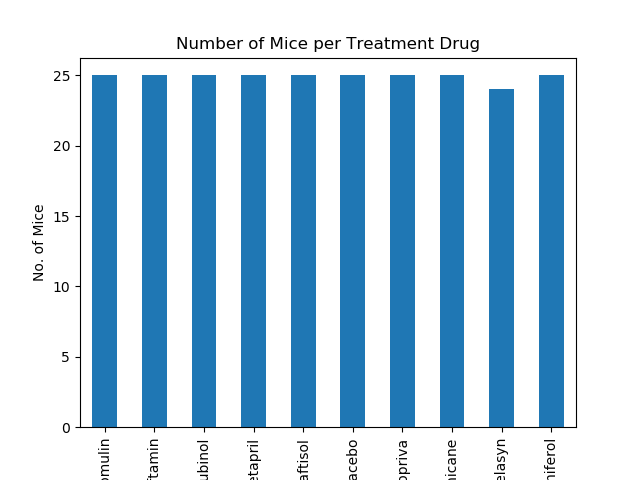

Text(0.5, 1.0, 'Number of Mice per Treatment Drug')

In [97]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# treatment = mouse_study_TmrVol_count
# x_axis = np.arange(len(treatment))
# y_axis = mouse_study_TmrVol_count["Mouse ID"]
mouse_study_count.plot(kind="bar")
plt.xlabel("Drug Regimen") 
plt.ylabel("No. of Mice") 
plt.title("Number of Mice per Treatment Drug") 

<IPython.core.display.Javascript object>


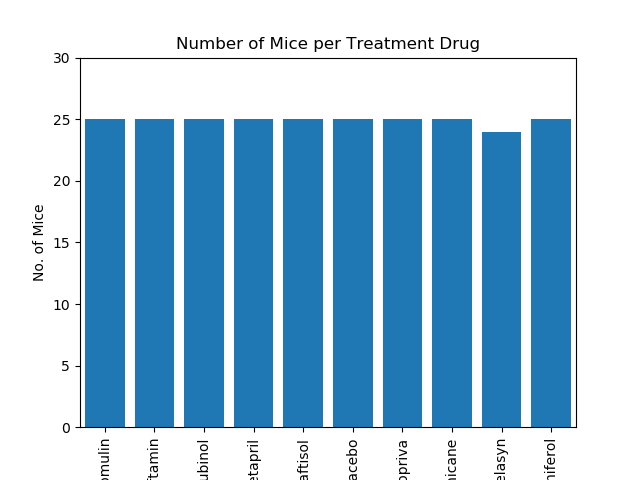

In [95]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatments = mouse_study_cleaned.groupby(["Drug Regimen"])["Mouse ID"].nunique()

treatments_and_mice = treatments.to_frame().reset_index()

plt.bar(treatments_and_mice["Drug Regimen"],treatments_and_mice["Mouse ID"], )
plt.xlim(-0.25, len(treatments))
plt.ylim(0, max(treatments_and_mice["Mouse ID"])+5)
plt.xlabel("Drug Regimen") 
plt.ylabel("No. of Mice") 
plt.title("Number of Mice per Treatment Drug") 
plt.show()



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
